In [13]:

import cv2
import os
import numpy as np

GENDER_MODEL = "weights/gender_deploy.prototxt"

GENDER_PROTO = "weights/gender_net.caffemodel"

MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)

GENDER_LIST = ['Male', 'Famale']

frame_width = 1280
frame_height = 720


gender_net = cv2.dnn.readNet(GENDER_MODEL, GENDER_PROTO)

## Displaying an Image with its prediction using OpenCV

In [14]:
import cv2

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def predict_gender(image):
    frame = cv2.imread(image)

    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=10, minSize=(30, 30))

    for i, (x, y, w, h) in enumerate(faces):
                face_img = frame[y: y+h, x: x+w]

                blob = cv2.dnn.blobFromImage(
                    image=face_img, scalefactor=1.0, size=(227, 227), 
                    mean=MODEL_MEAN_VALUES, swapRB=False
                )

                gender_net.setInput(blob)
                gender_preds = gender_net.forward()
                gender = GENDER_LIST[gender_preds[0].argmax()]

                cv2.putText(frame, f"Gender: {gender}", (x-40, y-40), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 2)

                cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
                
    cv2.imshow('Face Detection on Video Stream', frame)
    cv2.waitKey(0)
    cv2.destroyAllWindows()



In [15]:
predict_gender("male_female.jpeg")
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)

-1

## Displaying an Image with its prediction using Matplotlib

In [16]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches


def predict_gender_new(image):
    frame = cv2.imread(image)

    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=10, minSize=(30, 30))

    fig, ax = plt.subplots(1)

    ax.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

    for i, (x, y, w, h) in enumerate(faces):

        print(x,y,w,h)

        rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='g', facecolor='none')

        ax.add_patch(rect)

        gender_net.setInput(cv2.dnn.blobFromImage(frame[y:y+h, x:x+w], scalefactor=1.0, size=(227, 227), mean=MODEL_MEAN_VALUES, swapRB=False))
        gender_preds = gender_net.forward()
        gender = GENDER_LIST[gender_preds[0].argmax()]

        ax.text(x, y-10, f"Gender: {gender}", fontsize=12, color='red')
    ax.set_axis_off()

    plt.show()


618 818 389 389
1324 992 321 321
1690 1133 182 182


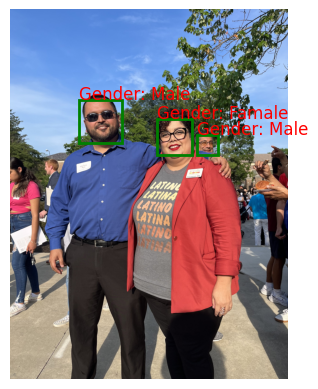

In [17]:
predict_gender_new("male_female.jpeg")

801 850 383 383
1216 947 409 409


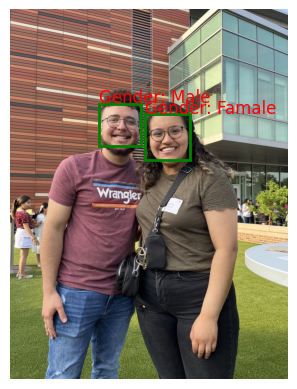

In [18]:
predict_gender_new("male_female3.jpeg")

246 43 76 76


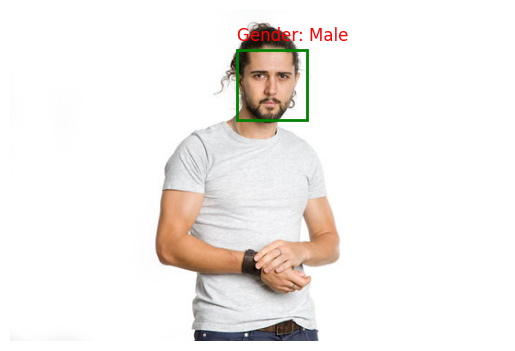

In [19]:
predict_gender_new("adult.jpeg")

## Testing the Model on Live Camera

In [29]:
import cv2

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(0)

while True:
        ret, frame = cap.read()

        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=10, minSize=(30, 30))

        for i, (x, y, w, h) in enumerate(faces):
            face_img = frame[y: y+h, x: x+w]

            blob = cv2.dnn.blobFromImage(
                image=face_img, scalefactor=1.0, size=(227, 227), 
                mean=MODEL_MEAN_VALUES, swapRB=False
            )

            gender_net.setInput(blob)
            gender_preds = gender_net.forward()

            gender = GENDER_LIST[gender_preds[0].argmax()]

            cv2.putText(frame, f"Gender: {gender}", (x-80, y-40), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 255, 0), 2)

            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

        cv2.imshow('Face Detection on Video Stream', frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)





-1